In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
sns.set()

In [2]:
raw_data = pd.read_csv('/Users/aryamonani/Desktop/Development/Census_Data_Modified.csv')
raw_data.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income,Citizenship,Area
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,0,4356,40,United-States,<=50K,PR,Urban
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K,PR,Urban
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,0,4356,40,United-States,<=50K,PR,Rural
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K,PR,Urban
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K,PR,Urban
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,0,3770,45,United-States,<=50K,PR,Urban
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,0,3770,40,United-States,<=50K,Citizen,Urban
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,0,3683,20,United-States,>50K,PR,Urban
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,0,3683,40,United-States,<=50K,PR,Urban
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,0,3004,60,United-States,>50K,Citizen,Urban


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
Citizenship       32561 non-null object
Area              32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
raw_data.describe(include = 'all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income,Citizenship,Area
count,32561.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561.000000,32561.000000,32561.000000,32561,32561,32561,32561
unique,NaN,8,NaN,16,NaN,7,14,6,NaN,NaN,NaN,41,2,2,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,NaN,NaN,NaN,United-States,<=50K,Citizen,Urban
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,NaN,NaN,NaN,29753,24720,21790,27816
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN,NaN,NaN


## Data Cleaning

In [5]:
#find special characters
raw_data.isin(['?']).sum(axis = 0)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
Citizenship       0
Area              0
dtype: int64

In [6]:
data_no_mv = raw_data.dropna(axis = 0, inplace = False)

In [7]:
data_no_mv.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
Citizenship       0
Area              0
dtype: int64

In [8]:
data_no_mv.describe(include = 'all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income,Citizenship,Area
count,30718.000000,30718,3.071800e+04,30718,30718.000000,30718,30718,30718,30718.000000,30718.000000,30718.000000,30718,30718,30718,30718
unique,NaN,7,NaN,16,NaN,7,14,6,NaN,NaN,NaN,41,2,2,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,NaN,NaN,NaN,United-States,<=50K,Citizen,Urban
freq,NaN,22696,NaN,9968,NaN,14339,4140,12704,NaN,NaN,NaN,28060,23068,20788,26301
mean,38.443584,NaN,1.898455e+05,NaN,10.130314,NaN,NaN,NaN,1106.037079,88.910216,40.949313,NaN,NaN,NaN,NaN
std,13.118227,NaN,1.054583e+05,NaN,2.562469,NaN,NaN,NaN,7497.863364,405.657203,11.985382,NaN,NaN,NaN,NaN
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,28.000000,NaN,1.178285e+05,NaN,9.000000,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN,NaN,NaN
50%,37.000000,NaN,1.785170e+05,NaN,10.000000,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN,NaN,NaN
75%,47.000000,NaN,2.373170e+05,NaN,13.000000,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN,NaN,NaN


In [9]:
for c in data_no_mv:
    print('-----%s------'%c)
    print(data_no_mv[c].value_counts())

-----age------
36    875
31    869
34    860
33    849
37    849
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64
-----workclass------
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Name: workclass, dtype: int64
-----fnlwgt------
164190    13
203488    13
113364    12
126675    12
121124    12
          ..
86972      1
48976      1
138162     1
197757     1
125489     1
Name: fnlwgt, Length: 20495, dtype: int64
-----education------
HS-grad         9968
Some-college    6775
Bachelors       5182
Masters         1675
Assoc-voc       1321
11th            1056
Assoc-acdm      1020
10th             831
7th-8th          573
Prof-school      558
9th              463
Doctorate        398
12th             393
5th-6th          303
1st-4th          156
Preschool         46
Name: education, dtype: int64
-----education_n

In [10]:
data_no_unq = data_no_mv.drop(['age', 'fnlwgt', 'capital_gain', 'capital_loss', 
                               'hours_per_week'], axis = 1, inplace = False)

In [11]:
data_no_unq.sample(10)

,workclass,education,education_num,marital_status,occupation,relationship,native_country,income,Citizenship,Area
25375,Private,HS-grad,9,Divorced,Other-service,Unmarried,United-States,<=50K,PR,Urban
18293,Private,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,United-States,<=50K,PR,Urban
31575,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,United-States,<=50K,Citizen,Urban
4716,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,United-States,<=50K,Citizen,Urban
14647,Private,HS-grad,9,Never-married,Other-service,Not-in-family,United-States,<=50K,Citizen,Urban
6606,Private,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,United-States,>50K,Citizen,Urban
21704,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,United-States,<=50K,Citizen,Urban
23627,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,United-States,<=50K,Citizen,Urban
6789,Self-emp-not-inc,HS-grad,9,Never-married,Farming-fishing,Own-child,United-States,<=50K,Citizen,Urban
4744,Private,Some-college,10,Never-married,Adm-clerical,Not-in-family,United-States,<=50K,Citizen,Urban


In [12]:
for c in data_no_unq:
    print('-----%s------'%c)
    print(data_no_unq[c].value_counts()) #Its clear that there are no unique values anymore and
                                         #noisy data is taken care of.

-----workclass------
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Name: workclass, dtype: int64
-----education------
HS-grad         9968
Some-college    6775
Bachelors       5182
Masters         1675
Assoc-voc       1321
11th            1056
Assoc-acdm      1020
10th             831
7th-8th          573
Prof-school      558
9th              463
Doctorate        398
12th             393
5th-6th          303
1st-4th          156
Preschool         46
Name: education, dtype: int64
-----education_num------
9     9968
10    6775
13    5182
14    1675
11    1321
7     1056
12    1020
6      831
4      573
15     558
5      463
16     398
8      393
3      303
2      156
1       46
Name: education_num, dtype: int64
-----marital_status------
Married-civ-spouse       14339
Never-married             9912
Divorced                  4258
Separated                 

## Feature Engineering

In [13]:
#We need to take care of our dependent variable, 'income'. We will convert it into numerical form.
data_no_unq['income'] = data_no_unq['income'].map({'<=50K' : 0, '>50K' : 1}).astype(int)

In [14]:
data_no_unq.sample(10)

,workclass,education,education_num,marital_status,occupation,relationship,native_country,income,Citizenship,Area
23822,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Husband,United-States,0,Citizen,Urban
22510,Private,Some-college,10,Divorced,Adm-clerical,Unmarried,United-States,0,PR,Urban
19744,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,United-States,0,PR,Urban
22289,State-gov,HS-grad,9,Married-civ-spouse,Tech-support,Husband,United-States,0,Citizen,Urban
13653,Private,Some-college,10,Never-married,Other-service,Other-relative,United-States,0,PR,Urban
23032,Private,11th,7,Divorced,Farming-fishing,Not-in-family,United-States,0,Citizen,Urban
25713,Private,HS-grad,9,Separated,Craft-repair,Not-in-family,United-States,0,Citizen,Rural
13764,Private,Assoc-voc,11,Never-married,Adm-clerical,Own-child,United-States,0,PR,Urban
24018,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,Philippines,1,Citizen,Rural
17932,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,United-States,0,Citizen,Urban


In [15]:
data_no_unq[['workclass', 'education', 'education_num', 'marital_status', 'occupation',
           'relationship', 'native_country', 'Citizenship', 'Area', 'income']]

,workclass,education,education_num,marital_status,occupation,relationship,native_country,Citizenship,Area,income
1,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,United-States,PR,Urban,0
3,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,United-States,PR,Urban,0
4,Private,Some-college,10,Separated,Prof-specialty,Own-child,United-States,PR,Urban,0
5,Private,HS-grad,9,Divorced,Other-service,Unmarried,United-States,PR,Urban,0
6,Private,10th,6,Separated,Adm-clerical,Unmarried,United-States,Citizen,Urban,0
...,...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,United-States,Citizen,Urban,0
32557,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,United-States,PR,Urban,0
32558,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,United-States,Citizen,Urban,1
32559,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,United-States,PR,Urban,0


In [16]:
data_no_unq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 1 to 32560
Data columns (total 10 columns):
workclass         30718 non-null object
education         30718 non-null object
education_num     30718 non-null int64
marital_status    30718 non-null object
occupation        30718 non-null object
relationship      30718 non-null object
native_country    30718 non-null object
income            30718 non-null int64
Citizenship       30718 non-null object
Area              30718 non-null object
dtypes: int64(2), object(8)
memory usage: 2.6+ MB


In [17]:
cat_features = data_no_unq.select_dtypes(include = ['object']).columns #picked categorical features

In [18]:
cat_features

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'native_country', 'Citizenship', 'Area'],
      dtype='object')

LABEL ENCODER

In [19]:
label_encoder = preprocessing.LabelEncoder()
for features in cat_features:
    encoded = label_encoder.fit_transform(data_no_unq[features])
    data_no_unq[features] = encoded

In [20]:
data_no_unq.sample(10) #Categorical features have been dealt with using label encoding.

,workclass,education,education_num,marital_status,occupation,relationship,native_country,income,Citizenship,Area
28783,2,8,11,4,0,1,38,0,1,1
14855,2,15,10,4,7,3,38,0,1,1
4967,4,11,9,2,11,0,38,0,0,1
23815,2,7,12,0,9,4,38,0,1,1
3881,2,11,9,4,2,3,38,0,0,0
32188,2,12,14,4,9,1,38,0,1,1
15951,2,1,7,2,11,0,38,1,0,1
25163,2,11,9,4,7,3,38,0,0,1
6930,0,7,12,5,9,1,38,1,1,1
30598,2,11,9,0,0,4,38,0,1,0


In [21]:
data_no_unq[['workclass', 'education', 'education_num', 'marital_status', 'occupation',
           'relationship', 'native_country', 'Citizenship', 'Area', 'income']]

,workclass,education,education_num,marital_status,occupation,relationship,native_country,Citizenship,Area,income
1,2,11,9,6,3,1,38,1,1,0
3,2,5,4,0,6,4,38,1,1,0
4,2,15,10,5,9,3,38,1,1,0
5,2,11,9,0,7,4,38,1,1,0
6,2,0,6,5,0,4,38,0,1,0
...,...,...,...,...,...,...,...,...,...,...
32556,2,15,10,4,10,1,38,0,1,0
32557,2,7,12,2,12,5,38,1,1,0
32558,2,11,9,2,6,0,38,0,1,1
32559,2,11,9,6,0,4,38,1,1,0


In [22]:
data_cleaned = data_no_unq.copy()

## Data Visualisation

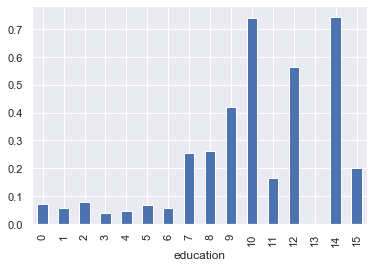

In [23]:
data_cleaned.groupby('education').income.mean().plot(kind='bar')

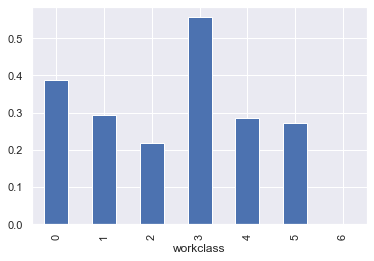

In [24]:
data_cleaned.groupby('workclass').income.mean().plot(kind='bar')

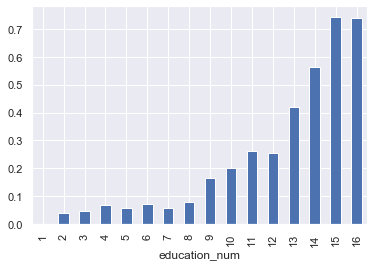

In [25]:
data_cleaned.groupby('education_num').income.mean().plot(kind='bar')

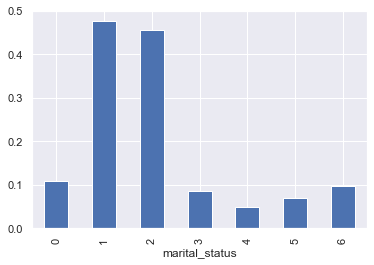

In [26]:
data_cleaned.groupby('marital_status').income.mean().plot(kind='bar')

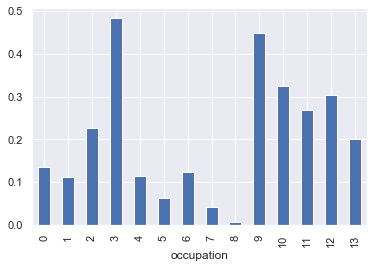

In [27]:
data_cleaned.groupby('occupation').income.mean().plot(kind='bar')

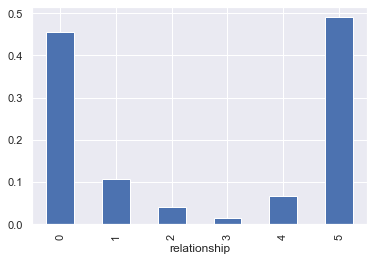

In [28]:
data_cleaned.groupby('relationship').income.mean().plot(kind='bar')

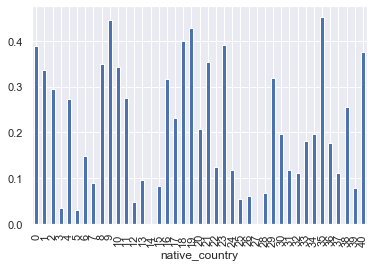

In [29]:
data_cleaned.groupby('native_country').income.mean().plot(kind='bar')

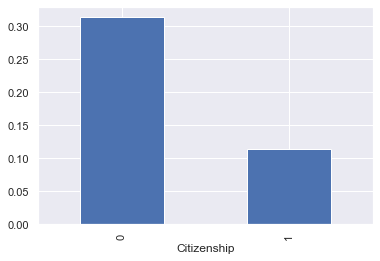

In [30]:
data_cleaned.groupby('Citizenship').income.mean().plot(kind='bar')

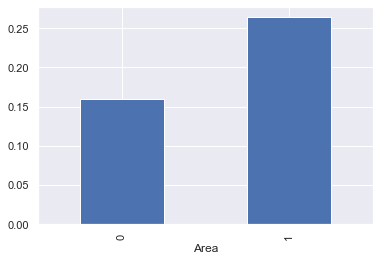

In [31]:
data_cleaned.groupby('Area').income.mean().plot(kind='bar')

In [32]:
#Every feature has some connection with income and therefore are all valid for our model

In [33]:
data_y = pd.DataFrame(data_cleaned.income)

In [34]:
data_X = data_cleaned.drop(['income'], axis = 1, inplace = False)

In [42]:
reg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size = 0.33, random_state = 42) 

In [43]:
reg.fit(X_train, y_train)

/Users/aryamonani/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/aryamonani/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [46]:
y_pred = reg.predict(X_test)

In [49]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8015191871362336


In [51]:
y_pred.shape

(10137,)

In [52]:
Predictions = reg.predict(data_X)

In [53]:
print("Accuracy:",metrics.accuracy_score(data_y, Predictions)) #80 precent accuracy

Accuracy: 0.8025913145387069


In [54]:
data_cleaned['Predictions'] = Predictions

In [56]:
data_cleaned.sample(50)

,workclass,education,education_num,marital_status,occupation,relationship,native_country,income,Citizenship,Area,Predictions
1700,2,9,13,0,3,1,38,1,1,0,0
6580,2,11,9,4,3,3,38,0,1,1,0
17228,2,9,13,2,3,0,38,1,0,1,1
20919,3,11,9,0,11,1,38,0,0,1,0
7279,2,11,9,2,6,0,38,0,0,1,0
8721,5,10,16,2,9,0,35,1,0,0,1
21444,4,15,10,2,3,0,38,0,0,1,0
10109,2,1,7,0,8,4,38,0,1,0,0
32063,3,15,10,0,4,1,38,0,0,1,0
17545,2,5,4,2,2,0,38,0,0,1,0
